# Comparacion de rendimiento de algoritmos de clasificacion para nuestro dataset de Burn Rate.

### *Logistic Regression vs Random Forest vs Decision Tree*

#### Importacion de librerias

In [1]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [12]:
# importar dataset
df = pd.read_csv('train.csv',sep=';')

In [3]:
# Nombres columnas
df.columns

Index(['Employee ID;Date of Joining;Gender;Company Type;WFH Setup Available;Designation;Resource Allocation;Mental Fatigue Score;Burn Rate'], dtype='object')

In [13]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30/9/2008,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,30/11/2008,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,10/3/2008,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,3/11/2008,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,24/7/2008,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30/12/2008,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,19/1/2008,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,5/11/2008,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,10/1/2008,Female,Service,No,2.0,5.0,5.9,0.52


In [14]:
# info de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [16]:
# descripcion estadistica
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee ID,18590,18590,fffe32003000360033003200,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Joining,18590,366,6/1/2008,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,18590,2,Female,9747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Type,18590,2,Service,12174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WFH Setup Available,18590,2,Yes,10030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,18590.0,NaN,NaN,NaN,2.179398,1.133148,0.0,1.0,2.0,3.0,5.0
Resource Allocation,18590.0,NaN,NaN,NaN,4.486552,2.044848,1.0,3.0,4.0,6.0,10.0
Mental Fatigue Score,18590.0,NaN,NaN,NaN,5.732173,1.920547,0.0,4.6,5.9,7.1,10.0
Burn Rate,18590.0,NaN,NaN,NaN,0.452444,0.197848,0.0,0.32,0.45,0.59,1.0


In [15]:
# Borrado de nulos
df.dropna(inplace=True)

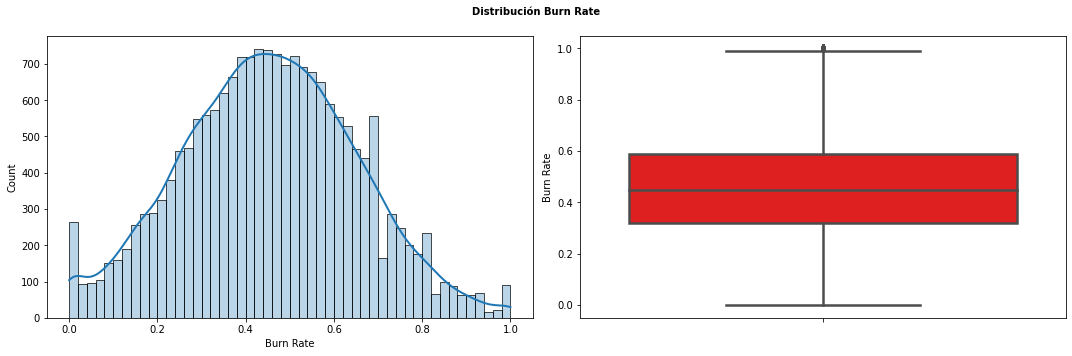

In [17]:
# Analisis de nueva clasificacion para Burn Rate de esta manera se podra aplicar segun mi criterio a una clasificacion binaria de estres.

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.histplot(
    data    = df,
    x       = 'Burn Rate',
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    alpha   = 0.3,
    ax = axes[0])
sns.boxplot(
    x=None, 
    y='Burn Rate',
    hue=None, 
    data=df,
    order=None, 
    hue_order=None,
    orient=None, 
    color='Red', 
    palette=None, 
    saturation=.75,
    width=.8, 
    dodge=True, 
    fliersize=5, 
    linewidth=2.5,
    whis=1.5, 
    ax=axes[1],
)

fig.show()

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución Burn Rate', fontsize = 10, fontweight = "bold");

In [18]:
# Se genera una nueva variable la cual si el valor del burn rate supera su mediana tendra un valor de 1, definido como estresado,
# si es menor a la mediana tendra un valor de 0, significante de no estresado, esto para fines practicos del algoritmo.

valorDivision= df['Burn Rate'].quantile(0.75)
# valorDivision= df['Burn Rate'].median()
# valorDivision= df['Burn Rate'].mean()

def rangeBurnRate(x):
    if x < valorDivision:
        return 0
    else:
        return 1

df['burn_rate_new'] = df['Burn Rate'].apply(lambda x :rangeBurnRate(x) )

df.burn_rate_new.value_counts(normalize=True)

0    0.74653
1    0.25347
Name: burn_rate_new, dtype: float64

In [20]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,burn_rate_new
0,fffe32003000360033003200,30/9/2008,Female,Service,No,2.0,3.0,3.8,0.16,0
1,fffe3700360033003500,30/11/2008,Male,Service,Yes,1.0,2.0,5.0,0.36,0
3,fffe32003400380032003900,3/11/2008,Male,Service,Yes,1.0,1.0,2.6,0.20,0
4,fffe31003900340031003600,24/7/2008,Female,Service,No,3.0,7.0,6.9,0.52,0
5,fffe3300350037003500,26/11/2008,Male,Product,Yes,2.0,4.0,3.6,0.29,0
...,...,...,...,...,...,...,...,...,...,...
22743,fffe3300390030003600,15/12/2008,Female,Product,Yes,1.0,3.0,6.0,0.48,0
22744,fffe32003500370033003200,27/5/2008,Male,Product,No,3.0,7.0,6.2,0.54,0
22746,fffe33003000350031003800,19/1/2008,Female,Product,Yes,3.0,6.0,6.7,0.59,1
22748,fffe33003300320036003900,10/1/2008,Female,Service,No,2.0,5.0,5.9,0.52,0


In [21]:
# Funcion para transformacion de X_train y X_test para hacer reproducible el modelo.
def transformacion(x):
    columnas ={
        'WFH Setup Available':'home_office',
        'Resource Allocation': 'res_allo',
        'Gender':'sex',
        'Designation':'desig',
        'Company Type':'comp_type',
        'Date of Joining':'date_join',
        'Employee ID':'id_employee',
        'Burn Rate':'burn_rate',
        'Mental Fatigue Score':'men_fat_score'
    }

    x.rename(columns=columnas,inplace=True)

    # Realizo transformacion de Designation y Resource Allocation para poder generar su aplicacion de One Hot Encoding, 
    # al ser variables numericas.
    x['desig']= x['desig'].astype('object')
    x['res_allo'] = x['res_allo'].astype('object')

    # Realizamos la aplicacion del one hote encoding para las columnas transformadas.
    x_encoder= pd.get_dummies(x[['sex','comp_type','home_office','desig','res_allo']])

    return x,x_encoder
    

# Aplicacion Modelo de Regresion Logistica

#### *Es un método para problemas de clasificación, en los que se obtienen un valor binario entre 0 y 1.*

#### *La Regresión Logística describe y estima la relación entre una variable binaria dependiente y las variables independientes*

#### *Separacion de caracteristicas y variable objetivo*

In [22]:
# separo las features en X e y
caracteristicas = df.drop(['burn_rate_new','Burn Rate','Employee ID','Date of Joining'],axis=1)
objetivo = df[['burn_rate_new']]

In [23]:
# Separo el dataset en Train y Test, al no estar desbalanceado.
X_train,X_test,y_train,y_test = train_test_split(
    caracteristicas,
    objetivo,
    test_size=0.3,
    random_state=42,
    stratify=objetivo
)

#### *Transformar X_train*

In [24]:
X_train,X_train_encoder = transformacion(X_train)

#### *Creacion de modelo*

In [25]:
lg = LogisticRegression(
        penalty="l2",
        dual=False,
        tol=1e-4,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        random_state=34,
        solver="lbfgs",
        max_iter=100,
        multi_class="auto",
        verbose=0,
        warm_start=False,
        n_jobs=1,
        l1_ratio=None,
)

# Entreno el modelo
lg.fit(X_train_encoder,y_train)

LogisticRegression(n_jobs=1, random_state=34)

In [32]:
y_train

,burn_rate_new
3247,0
13504,0
20877,1
15557,0
5284,0
...,...
2817,0
19772,1
4238,0
15678,1


#### *Transformar X_test*

In [26]:
X_test,X_test_encoder = transformacion(X_test)

### *Prediccion*

In [27]:
# Hago la prediccion
y_predict = lg.predict(X_test_encoder)

In [31]:
y_predict

array([1, 0, 0, ..., 1, 1, 0])

### *Vista de comparacion de prediccion vs testeo*

In [28]:
X_test['pred'] = y_predict
X_test['target'] = y_test
X_test.sample(10)

,sex,comp_type,home_office,desig,res_allo,men_fat_score,pred,target
10727,Female,Service,No,2.0,5.0,6.3,0,1
3612,Female,Service,Yes,2.0,3.0,4.7,0,0
2885,Female,Product,Yes,1.0,1.0,1.8,0,0
3573,Male,Product,No,3.0,6.0,6.4,1,1
2820,Female,Product,Yes,2.0,3.0,3.5,0,0
5639,Female,Service,No,1.0,3.0,6.5,0,0
7806,Female,Service,Yes,2.0,3.0,6.1,0,0
6788,Male,Product,Yes,2.0,4.0,4.3,0,0
13475,Female,Service,No,2.0,4.0,5.0,0,0
21399,Female,Service,No,4.0,9.0,9.9,1,1


### *Metricas R2*

In [29]:
# Accuracy para Train y Test
lg_train_r2 = lg.score(X_train_encoder,y_train)
lg_test_r2 = lg.score(X_test_encoder,y_test)

# Calculo para el accuracy de Train
print(f'% de aciertos para el entrenamiento: {lg_train_r2}')

# Calculo para el accuracy de Test
print(f'% de aciertos para la prediccion: {lg_test_r2}')

% de aciertos para el entrenamiento: 0.8632137093675555
% de aciertos para la prediccion: 0.8601398601398601


### *Matriz de confusion*

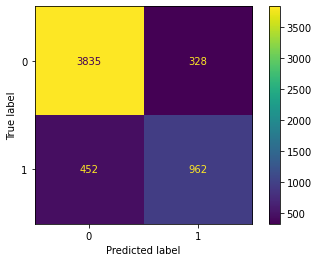

In [30]:
lg_confusion_matriz = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(lg, X_test_encoder, y_test)

### *Metricas de clasificacion*

In [33]:
lg_clasification_report = classification_report(y_test,y_predict)
print(lg_clasification_report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4163
           1       0.75      0.68      0.71      1414

    accuracy                           0.86      5577
   macro avg       0.82      0.80      0.81      5577
weighted avg       0.86      0.86      0.86      5577



### *Vista de features mas importantes*

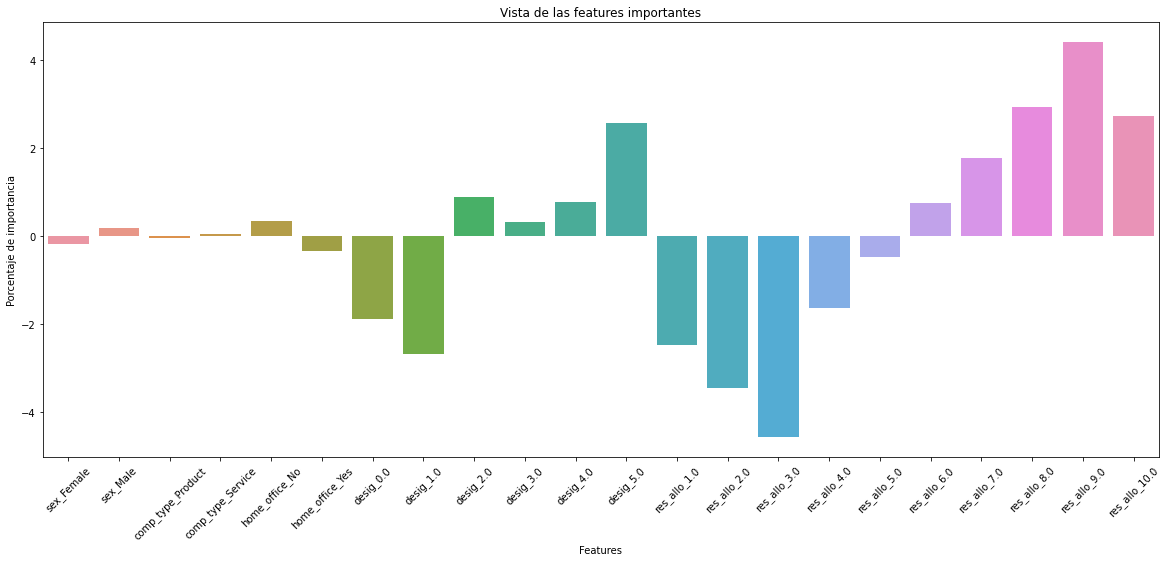

In [34]:
# Grafico las features mas importantes
df_features_importance = pd.DataFrame({
    'Feature':list(lg.feature_names_in_),
    'Importance':list(lg.coef_[0])
})

# print(df_features_importance)

plt.figure(figsize=(20,8))
sns.barplot(
    df_features_importance.Feature,
    df_features_importance.Importance,
    orient='v'
)
plt.title('Vista de las features importantes')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Porcentaje de importancia')
plt.show()

<Figure size 3600x900 with 0 Axes>

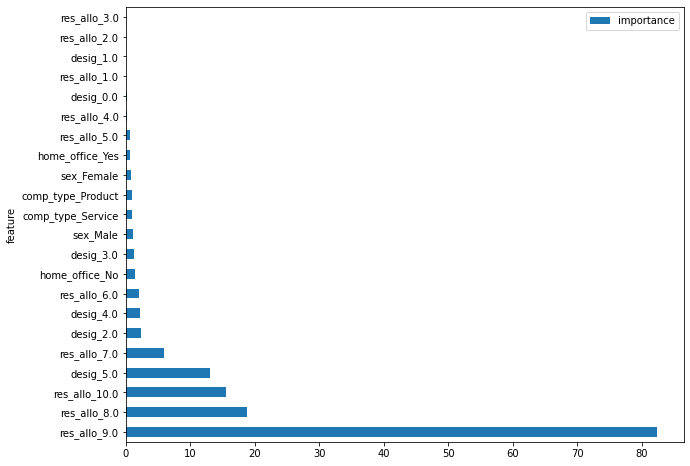

In [40]:
import math

feature_importance = pd.DataFrame(lg.feature_names_in_, columns = ["feature"])
feature_importance["importance"] = pow(math.e, lg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
plt.figure(figsize=(20,5),dpi=180)
ax = feature_importance.plot.barh(x='feature', y='importance',figsize=(10,8))
plt.show()

# Aplicacion Modelo de Random Forest

### *Random Forest es un tipo de Ensamble en Machine Learning en donde combinaremos diversos árboles de decisión.*

### *También llamados métodos combinados, intentan ayudar a mejorar el rendimiento de los modelos de Machine Learning. Este es un proceso mediante el cual se construyen estratégicamente varios modelos de ML para resolver un problema particular.*



### *Separacion de caracteristicas y target*

In [ ]:
# separo las features en X e y
X = df.drop(['burn_rate_new','Burn Rate','Employee ID','Date of Joining'],axis=1)
y = df[['burn_rate_new']]

In [ ]:
# Separo el dataset en Train y Test, al no estar desbalanceado.
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

### *Transformar X_train*

In [ ]:
X_train,X_train_encoder = transformacion(X_train)

### *Creacion de modelo*

In [ ]:
# Todos los argumentos vienen por default, no se modifico ninguno.
rf = RandomForestClassifier(
        n_estimators=100,
        criterion="gini",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features="sqrt",
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0.0,
        max_samples=None,
)

### *Entrenamiento*

In [ ]:
# Entreno el modelo
rf.fit(X_train_encoder,y_train)

RandomForestClassifier()

### *Transformar X_test*

In [ ]:
X_test,X_test_encoder = transformacion(X_test)

### *Prediccion*

In [ ]:
# Hago la prediccion
y_predict = rf.predict(X_test_encoder)

### *Vista de comparacion de prediccion vs testeo*

In [ ]:
X_test['pred'] = y_predict
X_test['target'] = y_test
X_test.sample(10)

,sex,comp_type,home_office,desig,res_allo,men_fat_score,pred,target
19376,Female,Service,Yes,1.0,3.0,3.6,0,0
4449,Male,Product,Yes,2.0,4.0,5.3,0,0
5147,Female,Service,Yes,3.0,4.0,6.4,0,0
7268,Female,Service,Yes,3.0,7.0,6.9,1,0
10067,Female,Product,Yes,1.0,2.0,3.5,0,0
20723,Male,Service,No,3.0,6.0,8.3,1,1
2227,Female,Service,No,2.0,4.0,6.9,0,0
3185,Male,Product,Yes,0.0,2.0,2.9,0,0
8957,Female,Service,Yes,1.0,3.0,6.1,0,0
21226,Male,Product,No,2.0,5.0,7.3,0,0


### *Metricas*

In [ ]:
# Accuracy para Train y Test
rf_train_r2 = rf.score(X_train_encoder,y_train)
rf_test_r2 = rf.score(X_test_encoder,y_test)

# Calculo para el accuracy de Train
print(f'% de aciertos para el entrenamiento: {rf_train_r2}')

# Calculo para el accuracy de Test
print(f'% de aciertos para la prediccion: {rf_test_r2}')

% de aciertos para el entrenamiento: 0.864520095289326
% de aciertos para la prediccion: 0.8594226286533979


### *Matriz de confusion*

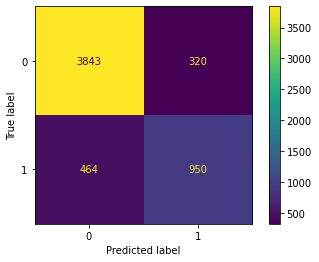

In [ ]:
rf_confusion_matriz = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(rf, X_test_encoder, y_test)

### *Metricas de clasificacion*

In [ ]:
rf_clasification_report = classification_report(y_test,y_predict)
print(rf_clasification_report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4163
           1       0.75      0.67      0.71      1414

    accuracy                           0.86      5577
   macro avg       0.82      0.80      0.81      5577
weighted avg       0.86      0.86      0.86      5577



### *Vista de features mas importantes*

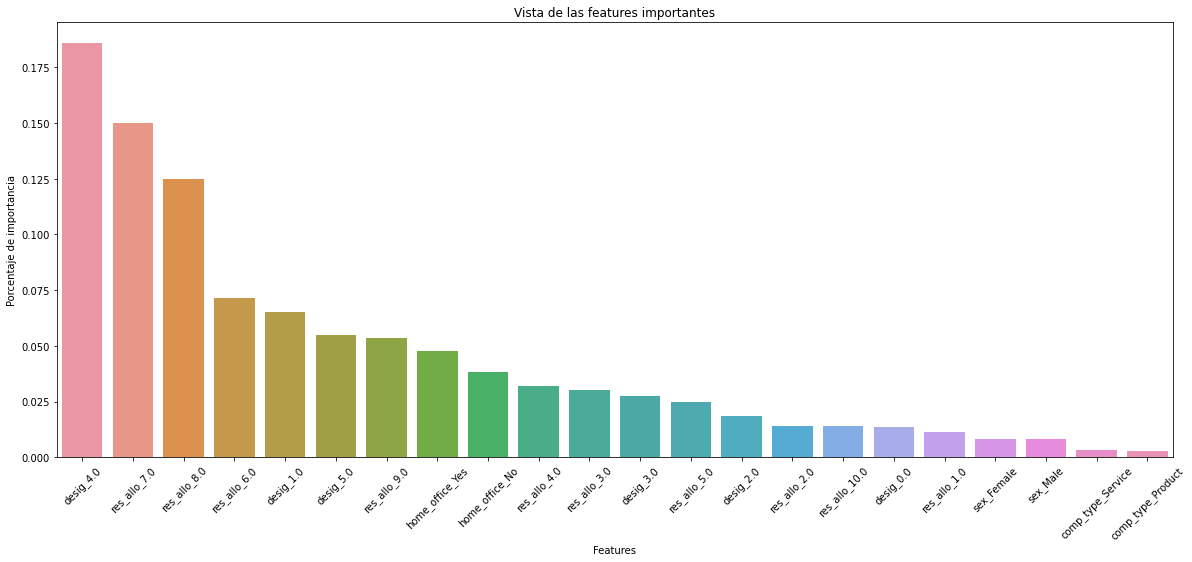

In [ ]:
# Grafico las features mas importantes
df_features_importance = pd.DataFrame({
    'Feature':list(rf.feature_names_in_),
    'Importance':list(rf.feature_importances_)
}).sort_values(by='Importance',ascending=False)

# print(df_features_importance)

plt.figure(figsize=(20,8))
sns.barplot(
    df_features_importance.Feature,
    df_features_importance.Importance,
    orient='v'
)
plt.title('Vista de las features importantes')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Porcentaje de importancia')
plt.show()

# Algoritmo de clasificacion - Decision Tree Regressor

### *Decision Tree es un algoritmo que se basa en arboles , los cuales tiene un sentido de pensamiento de if - else*

### *La verdad como todo algoritmo se necesita que todos los datos sea numericos y ademas es un algortimo supervisado,  es decir que depende de una variable target, sea numerica o categorica*

In [ ]:
# separo las features en X e y
X = df.drop(['burn_rate_new','Burn Rate','Employee ID','Date of Joining'],axis=1)
y = df[['burn_rate_new']]

In [ ]:
# Separo el dataset en Train y Test
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=None
)

In [ ]:
# Transformo X_train
X_train,X_train_encoder = transformacion(X_train)

In [ ]:
# Creo y entreno el modelo
dtc = DecisionTreeClassifier(
        criterion="gini",
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        class_weight=None,
        ccp_alpha=0.0,
)

In [ ]:
# Entreno
entrenamiento = dtc.fit(X_train_encoder,y_train)

In [ ]:
# Transformo X_test
X_test,X_test_encoder = transformacion(X_test)

In [ ]:
# Hago la prediccion
prediccion = dtc.predict(X_test_encoder)

In [ ]:
# Accuracy para Train y Test
dtc_train_r2 = dtc.score(X_train_encoder,y_train)
dtc_test_r2 = dtc.score(X_test_encoder,y_test)

# Calculo para el accuracy de Train
print(f'% de aciertos para el entrenamiento: {dtc_train_r2}')

# Calculo para el accuracy de Test
print(f'% de aciertos para la prediccion: {dtc_test_r2}')


% de aciertos para el entrenamiento: 0.8641358641358642
% de aciertos para la prediccion: 0.8628294782140936


### Matriz de confusion

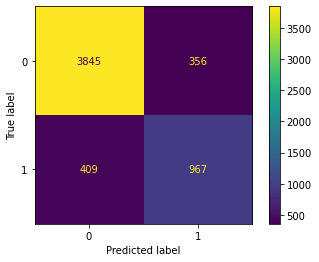

In [ ]:
dtc_confusion_matriz = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(dtc, X_test_encoder, y_test)

### Metricas de clasificacion

In [ ]:
dtc_clasification_report = classification_report(y_test,y_predict)
print(dtc_clasification_report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4201
           1       0.24      0.22      0.23      1376

    accuracy                           0.63      5577
   macro avg       0.50      0.50      0.50      5577
weighted avg       0.63      0.63      0.63      5577



### Features mas importantes

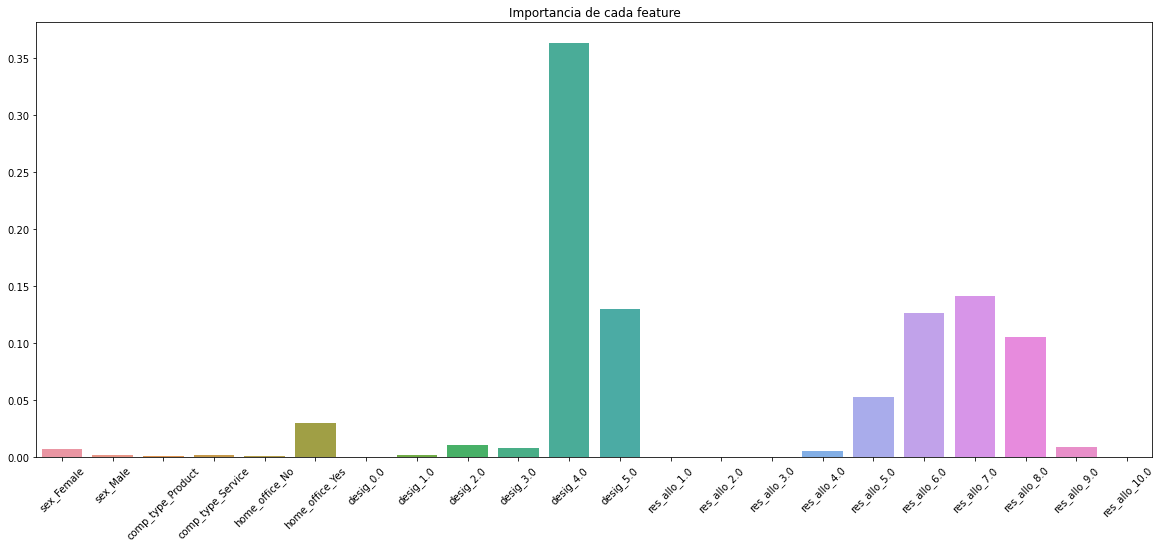

In [ ]:
# Grafico las features mas importantes
importances = dtc.feature_importances_
columnas = dtc.feature_names_in_
plt.figure(figsize=(20,8))
sns.barplot(columnas,importances)
plt.title('Importancia de cada feature')
plt.xticks(rotation=45)
plt.show()

# Matriz de confusion y R2 para cada Algoritmo

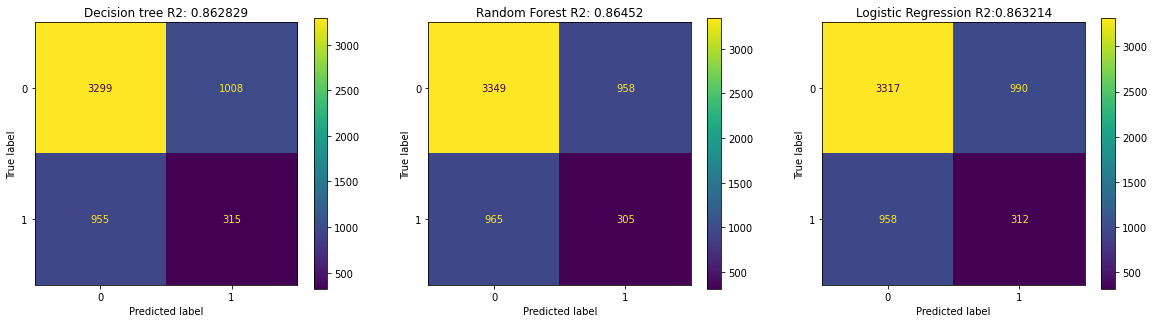

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

plot_confusion_matrix(dtc,X_test_encoder,y_predict,ax=axes[0]);
axes[0].set_title(f'Decision tree R2: {round(dtc_test_r2,6)}')

plot_confusion_matrix(rf,X_test_encoder,y_predict,ax=axes[1]);
axes[1].set_title(f'Random Forest R2: {round(rf_train_r2,6)}')

plot_confusion_matrix(lg,X_test_encoder,y_predict,ax=axes[2]);
axes[2].set_title(f'Logistic Regression R2:{round(lg_train_r2,6)}')

fig.show()